In [57]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [58]:
# Mount drive for stored data access
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
# Load data from 'complete_data.xlsx' data set found in drive
dataset_path ='/content/drive/My Drive/Difficult Words Data/DHH Children Data/'

data = pd.read_excel(dataset_path + 'complete_data.xlsx')

print("\nPREVIEW:")
display(data.head())



PREVIEW:


,words,no_of_char,syllable_count,Frequency_of_occurrence,"presence_of_ch,sh,th,st,f",part_of_speech,pronounce_g_j,Pronounce_c_k,overall_label
0,ABILITIES,1,1,0,0,1,0,0,0
1,ABORIGINAL,1,1,0,0,1,1,0,1
2,ABU DHABI,1,1,1,0,1,0,0,1
3,ACADEMY,1,1,1,0,1,0,1,1
4,ACCESS,0,0,1,0,1,0,1,1


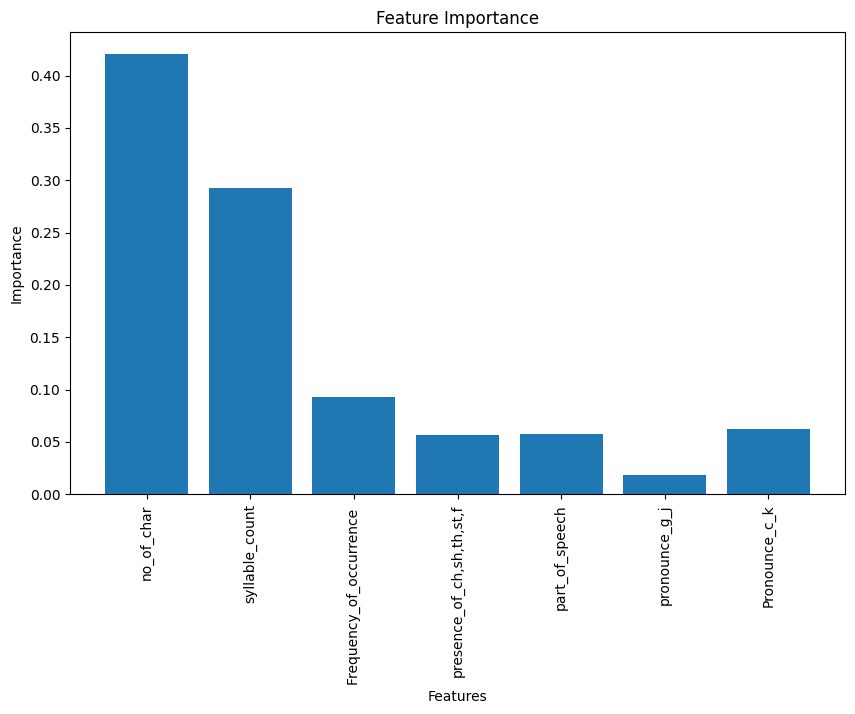


CLEANED PREVIEW


,no_of_char,syllable_count,Frequency_of_occurrence,"presence_of_ch,sh,th,st,f",part_of_speech,Pronounce_c_k,overall_label
0,1,1,0,0,1,0,0
1,1,1,0,0,1,0,1
2,1,1,1,0,1,0,1
3,1,1,1,0,1,1,1
4,0,0,1,0,1,1,1


In [60]:
# Define target column
target_column = "overall_label"

# Drop the 'words' column
X = data.drop([target_column, 'words'], axis=1)

# y contains target
y = data[target_column]

# Initialize Random Forest classifier
model = RandomForestClassifier()

# Fit the model
model.fit(X, y)

# Get feature importances from model
feature_importances = model.feature_importances_

# Create bar plot in order to visualize which features are import
plt.figure(figsize=(10, 6))
plt.bar(range(len(X.columns)), feature_importances)
plt.xticks(range(len(X.columns)), X.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')

# Display bar plot
plt.show()

# Set threshold value for importance, may be changed as needed
threshold = 0.05

# Determine if feature is important or not given threshold value
low_importance_features = X.columns[feature_importances < threshold]

# Removes features of low importance
X_cleaned = X.drop(low_importance_features, axis=1)

# Concatenate new cleaned data
cleaned_data = pd.concat([X_cleaned, y], axis=1)

# Display new cleaned data, showing which features have importance
print("\nCLEANED PREVIEW")
display(cleaned_data.head())